#### Demo3 CAST Project

In [1]:
import CAST
import scanpy as sc
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
work_dir = '$demo_path' #### input the demo path

Using backend: pytorch


In [2]:
output_path = f'{work_dir}/demo3_CAST_Projection/demo_output'
os.makedirs(output_path,exist_ok=True)
graph_list = {'rep1':['STAR_rep1','RIBO_rep1']} # source_sample, target_sample

#### CAST Project to project the STARmap data to the RIBOmap data

In [3]:
## This dataset contains 4 samples (STAR_rep1, RIBO_rep1, STAR_rep2, RIBO_rep2) and integrated features ('X_pca_harmony')
sdata = sc.read_h5ad(f'{output_path}/../data/demo3.h5ad')
sdata = CAST.preprocess_fast(sdata,mode = 'default')
batch_key = 'sample'

Preprocessing...


The `CAST_PROJECT()` function is used to project the `source_sample` (query sample) to `target_sample` (reference sample).


Start the rep1 samples:
Using the pre-integrated data X_pca_harmony and the UMAP X_umap
Start to project AC cells:
Using cosine distance to calculate cell low dimensional distance:


4it [00:13,  3.43s/it]


Start to project CHOR_EPEN cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:01,  1.55s/it]


Start to project CHO_PEP cells:
Using cosine distance to calculate cell low dimensional distance:


3it [00:06,  2.16s/it]


Start to project DE_MEN cells:
Using cosine distance to calculate cell low dimensional distance:


2it [00:04,  2.36s/it]


Start to project INH cells:
Using cosine distance to calculate cell low dimensional distance:


2it [00:03,  1.60s/it]


Start to project MLG cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:02,  2.59s/it]


Start to project OLG cells:
Using cosine distance to calculate cell low dimensional distance:


5it [00:11,  2.39s/it]


Start to project OPC cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:00,  1.19it/s]


Start to project Other cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:02,  2.41s/it]


Start to project PVM cells:
Using cosine distance to calculate cell low dimensional distance:


1it [00:01,  1.32s/it]


Start to project TEPN cells:
Using cosine distance to calculate cell low dimensional distance:


9it [00:23,  2.58s/it]


Start to project VAS cells:
Using cosine distance to calculate cell low dimensional distance:


3it [00:07,  2.63s/it]


Generate evaluation plots:


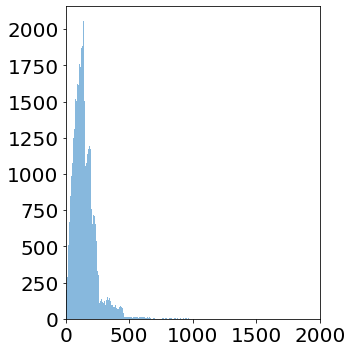

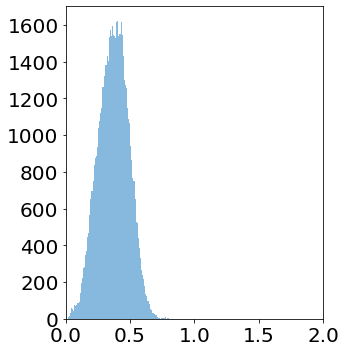

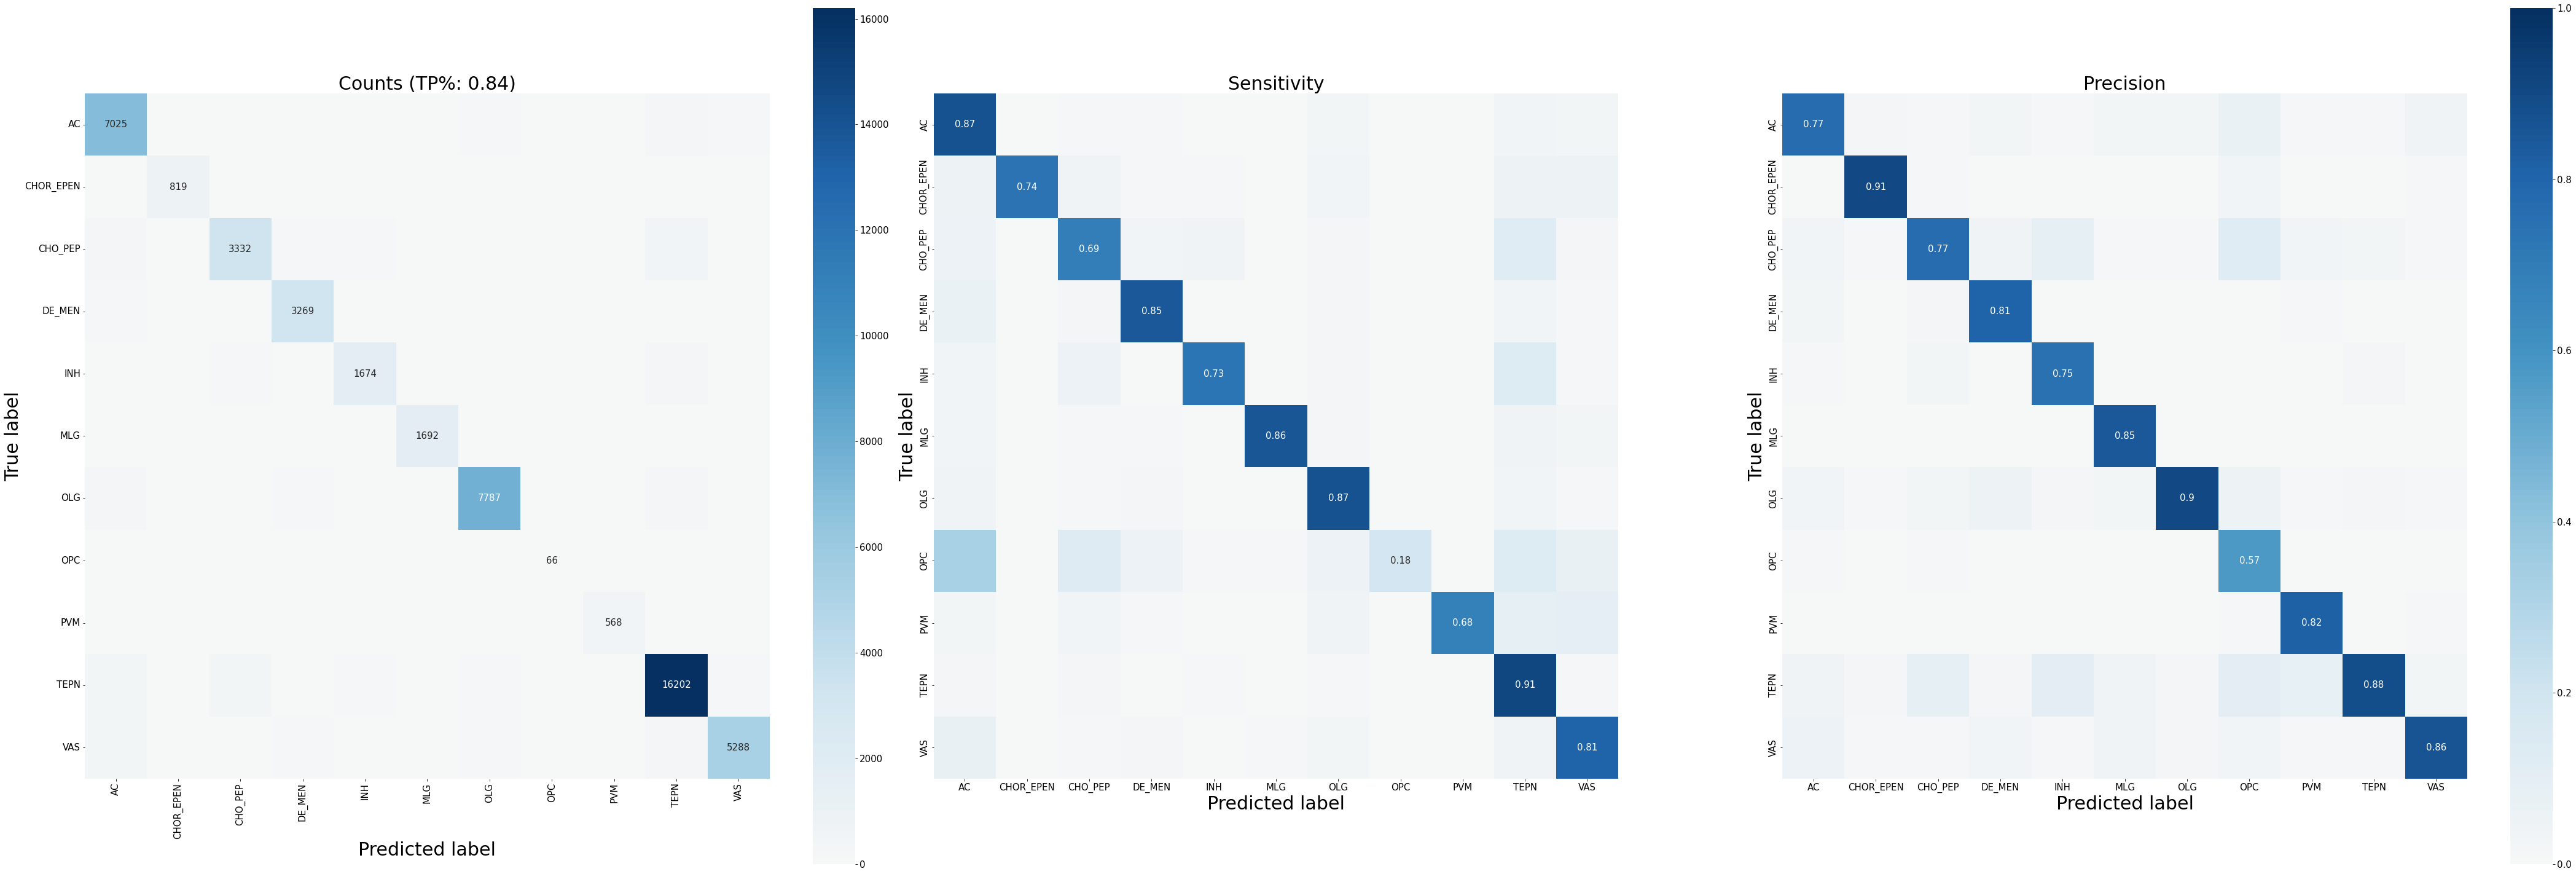

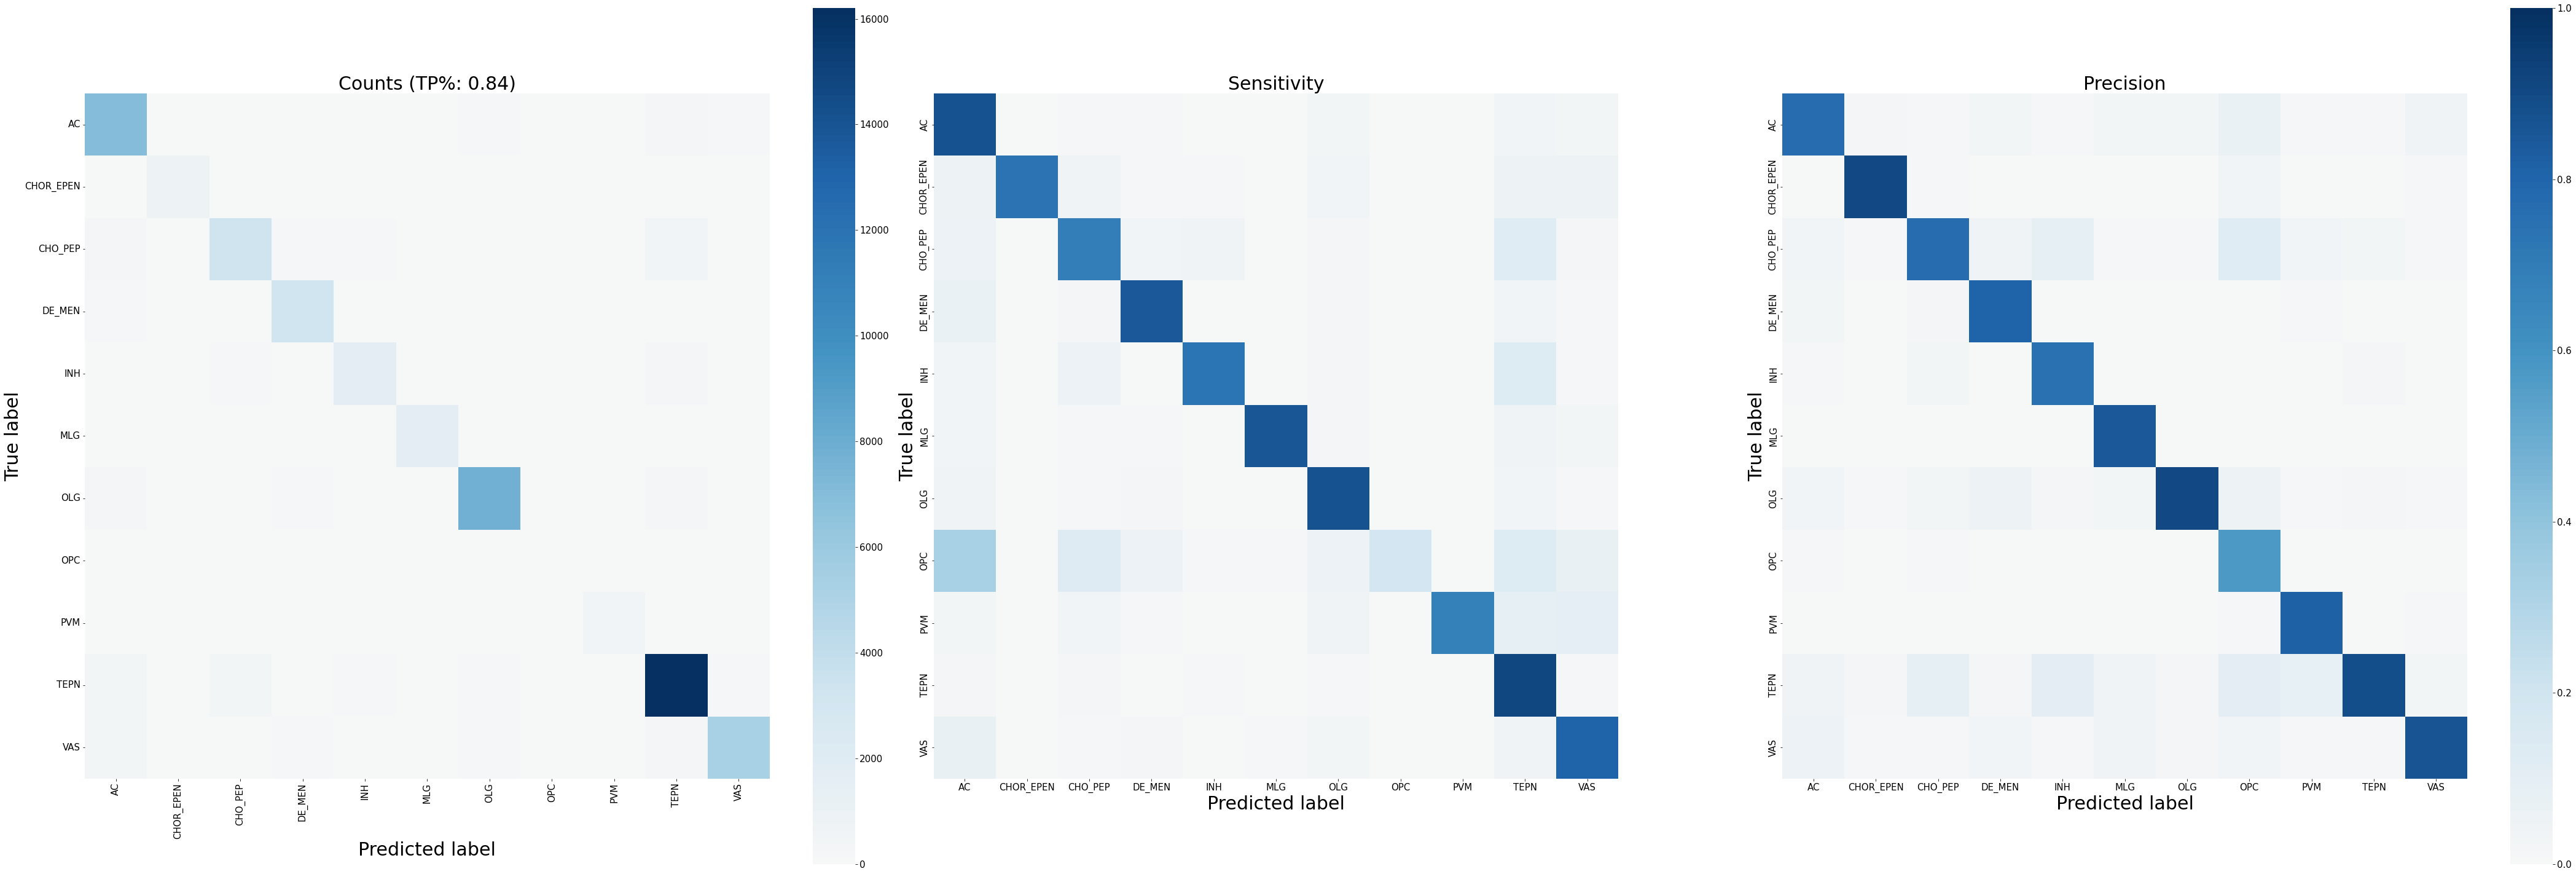

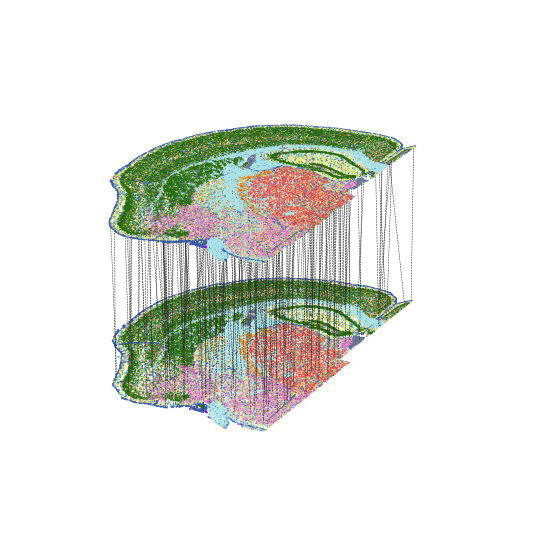

In [4]:
sdata_refs = {}
list_ts = {}
color_dict = {
        'TEPN': '#256b00',
        'INH': '#ee750a',
        'CHO_PEP': '#f280cf',
        'DE_MEN': '#f24f4b',
        'AC': '#e8e879',
        'OLG': '#a8e1eb',
        'VAS': '#395ba8',
        'CHOR_EPEN': '#697491',
        'PVM': '#8803fc',
        'MLG': '#23ccb8',
        'OPC': '#667872',
        'Other': '#ebebeb'
    }
for rep in graph_list.keys():
    print(f'Start the {rep} samples:')
    source_sample, target_sample = graph_list[rep]
    output_path_t = f'{output_path}/{source_sample}_to_{target_sample}'
    os.makedirs(output_path_t,exist_ok=True)
    sdata_refs[rep],list_ts[rep] = CAST.CAST_PROJECT(
        sdata_inte = sdata[np.isin(sdata.obs[batch_key],[source_sample, target_sample])], # the integrated dataset
        source_sample = source_sample, # the source sample name
        target_sample = target_sample, # the target sample name
        coords_source = np.array(sdata[np.isin(sdata.obs[batch_key],source_sample),:].obs.loc[:,['x','y']]), # the coordinates of the source sample
        coords_target = np.array(sdata[np.isin(sdata.obs[batch_key],target_sample),:].obs.loc[:,['x','y']]), # the coordinates of the target sample
        scaled_layer = 'log1p_norm_scaled', # the scaled layer name in `adata.layers`, which is used to be integrated
        batch_key = batch_key, # the column name of the samples in `obs`
        source_sample_ctype_col = 'cell_type', # the column name of the cell type in `obs`
        output_path = output_path_t, # the output path
        integration_strategy = None, # 'Harmony' or None (use existing integrated features)
        color_dict = color_dict # the color dict for the cell type
    )